<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-2-Sprint-2-Regression/blob/master/Connor_Heraty_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
%matplotlib inline

from ipywidgets import interact
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df = df.drop(['id','date'], axis = 1)
df.head()

(21613, 21)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df['price'].shape

(21613,)

In [0]:
df['bathrooms'].shape

(21613,)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: inv

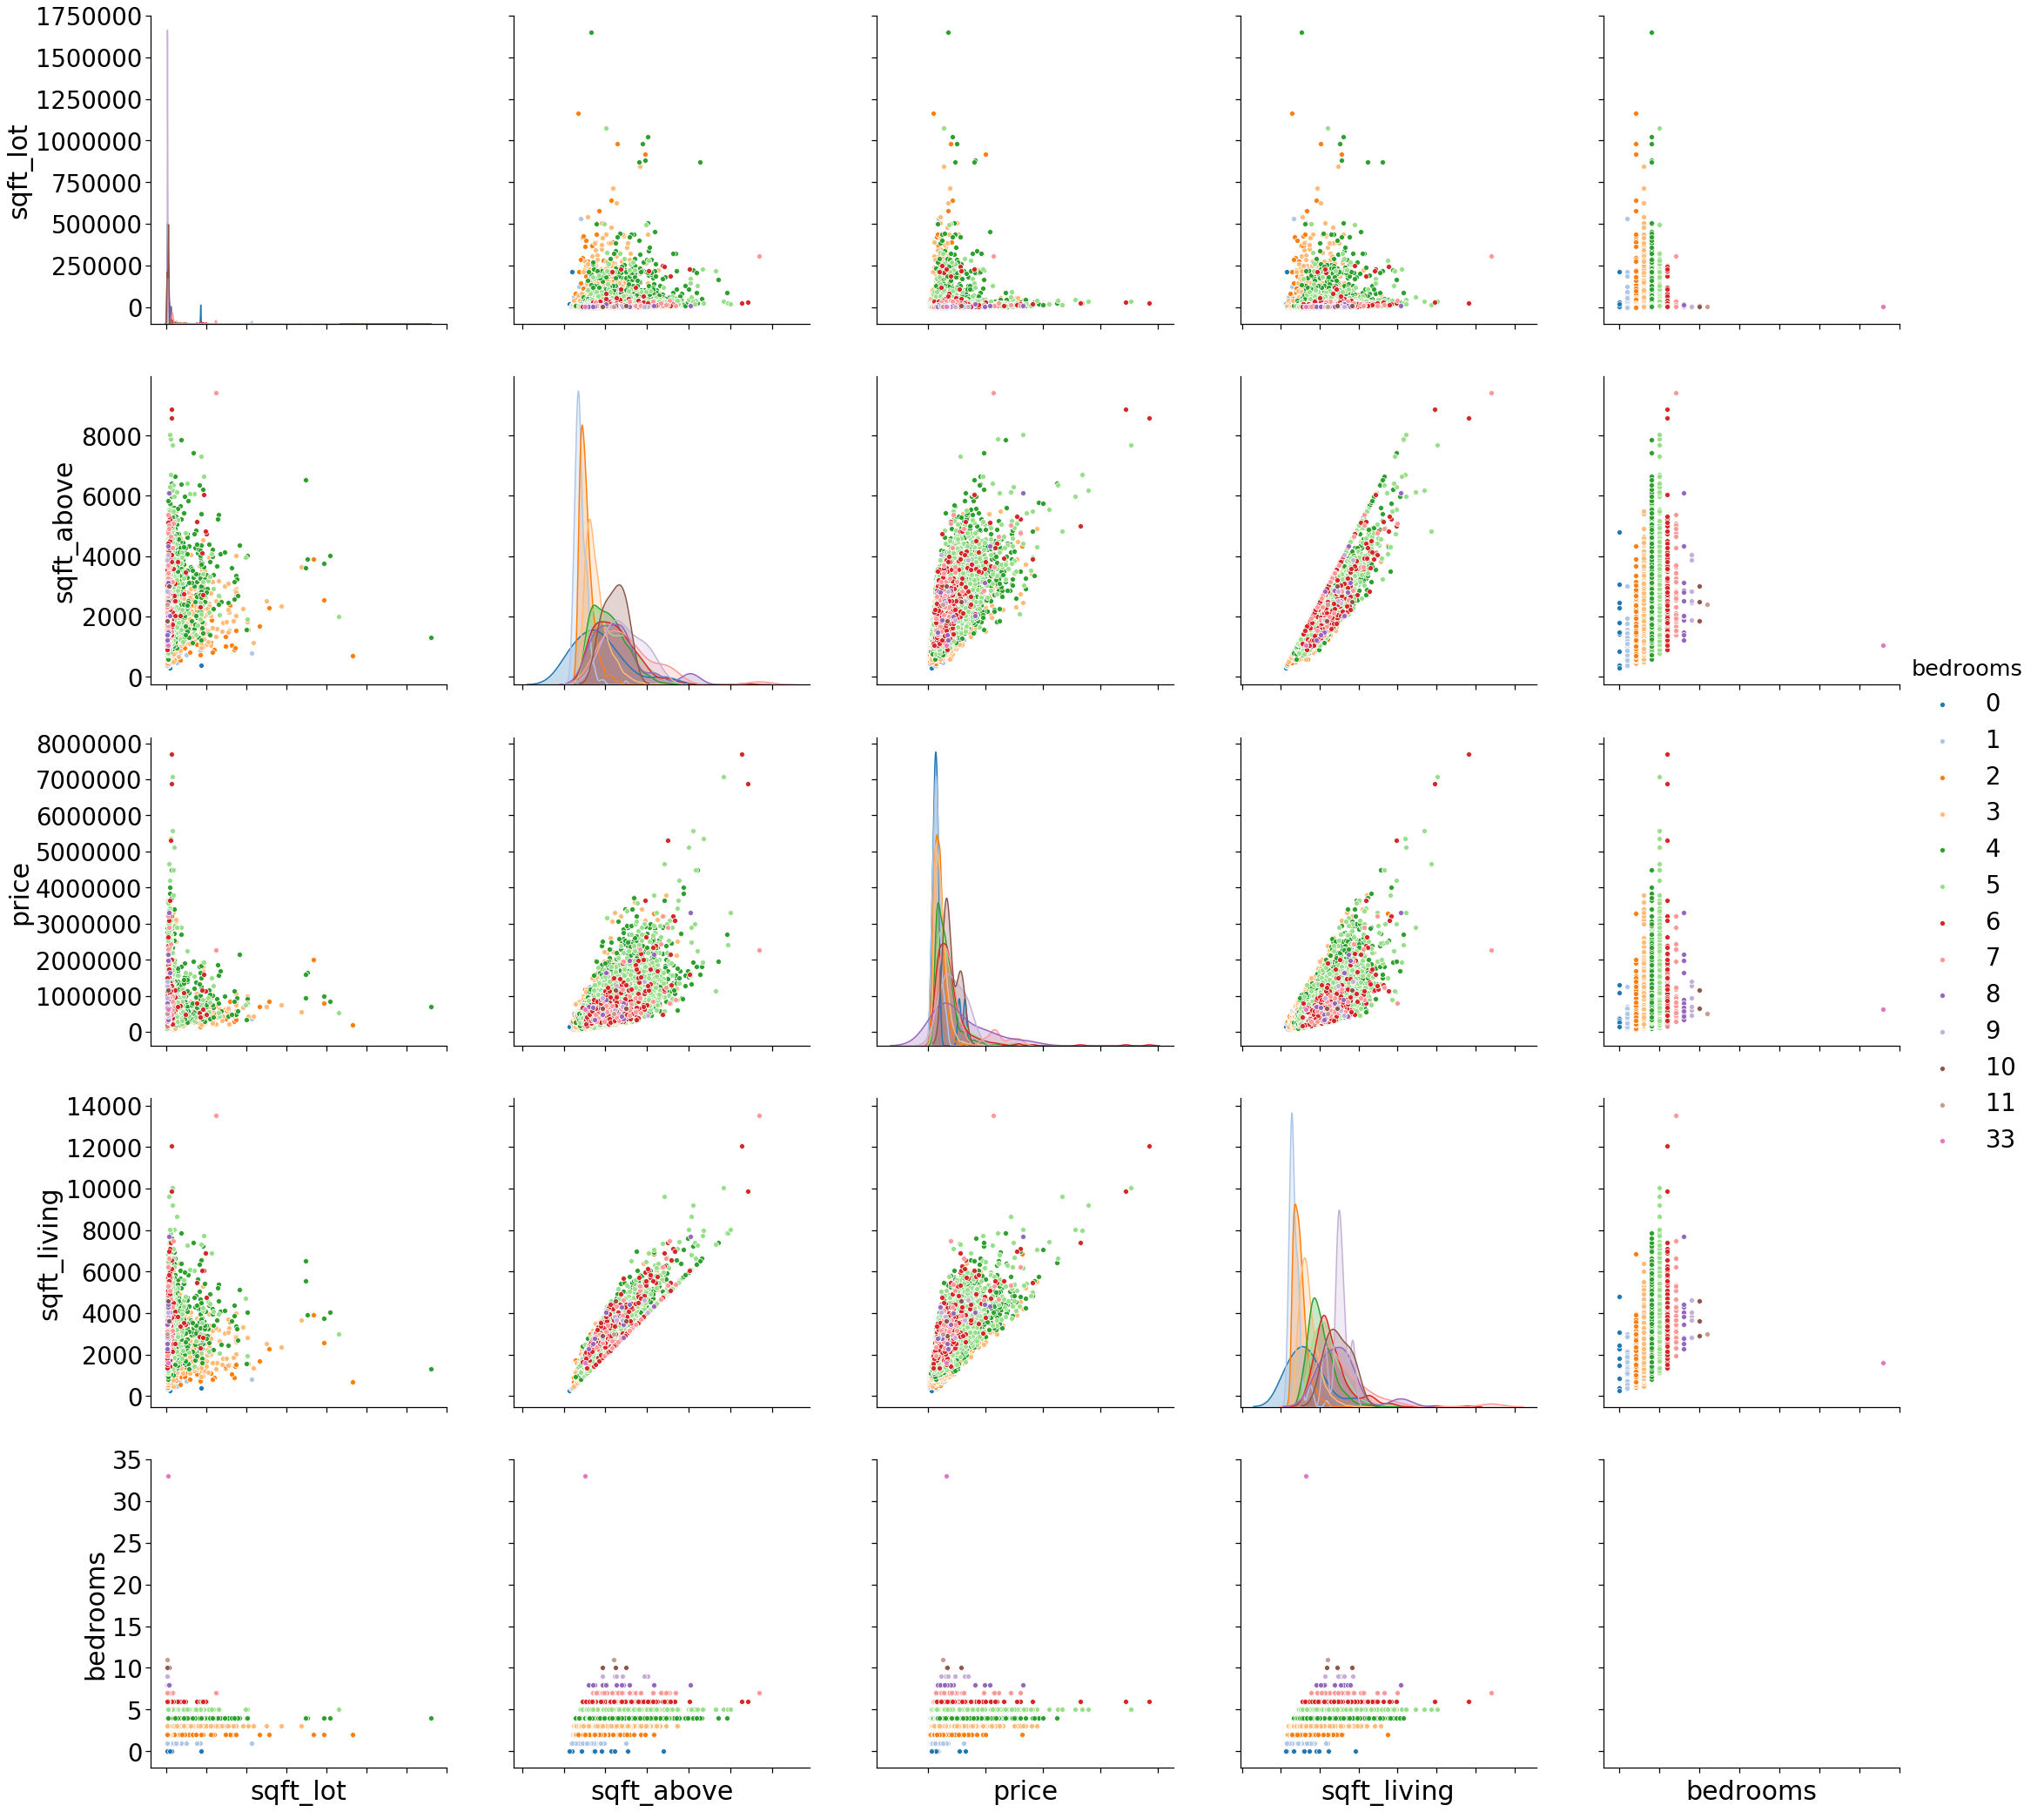

In [0]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

In [0]:
target = 'price'
feature = 'sqft_living'
X = df[[feature]]
y = df[target]

train = df.iloc[:(round(len(df)*.2))]
test  = df.iloc[(round(len(df)*.2)):]
X_train = train[feature]
y_train = train[target]
X_test  = test[feature]
y_test  = test[target]


X_train = X_train.values.reshape(4323,1)
X_test = X_test.values.reshape(17290,1)
y_train = y_train.values.reshape(4323,1)
y_test = y_test.values.reshape(17290,1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4323, 1), (4323, 1), (17290, 1), (17290, 1))

In [0]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
model.coef_, model.intercept_

(array([[295.79648729]]), array([-70971.02791314]))

In [0]:
bi_df = df.copy()

In [0]:
bi_df['Prediction'] = model.predict(X)

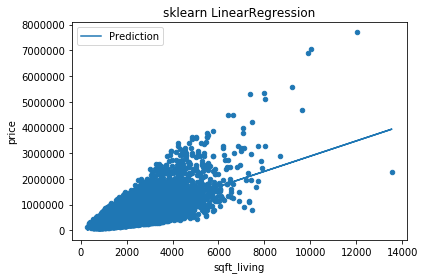

In [0]:
# Linear Regression Plot
ax = bi_df.plot(x=feature, y=target, kind='scatter', title='sklearn LinearRegression')
bi_df.plot(x=feature, y='Prediction', kind='line', ax=ax);

In [0]:
bi_df['Error'] = bi_df['Prediction'] - y

In [0]:
bi_df['Absolute Error'] = bi_df["Error"].abs()
bi_df['Square Error'] = bi_df['Error'] ** 2

In [0]:
bi_df['Square Error'].mean()

68562845157.78781

In [0]:
bi_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Prediction,Error,Absolute Error,Square Error
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,278068.827094,56168.827094,56168.827094,3.154937e+09
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,689225.944433,151225.944433,151225.944433,2.286929e+10
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,156792.267303,-23207.732697,23207.732697,5.385989e+08
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,508790.087184,-95209.912816,95209.912816,9.064927e+09
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,425967.070741,-84032.929259,84032.929259,7.061533e+09


In [0]:
mean_squared_error(y_true=y, y_pred=model.predict(X))

68562845157.78756

In [0]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(y, model.predict(X)))

261845.07854414138

In [0]:
model.score(X, y)

0.49128351631377704

In [0]:
# R Squared Score
r2_score(y, model.predict(X))

0.491283516313777

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
features = ['sqft_living', 'grade']
target = 'price'

X = df[features]
y = df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:06:53   Log-Likelihood:            -2.9934e+05
No. Observations:               21613   AIC:                         5.987e+05
Df Residuals:                   21610   BIC:                         5.987e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.981e+05   1.33e+04    -44.978      

In [0]:
model = LinearRegression()
model.fit(X,y)
print('Intercept:', model.intercept_)
pd.Series(model.coef_, features)

Intercept: -598108.9861714343


sqft_living      184.420206
grade          98554.798139
dtype: float64

In [0]:
train = df.iloc[:(round(len(df)*.2))]
test  = df.iloc[(round(len(df)*.2)):]
X_train = train[features]
y_train = train[target]
X_test  = test[features]
y_test  = test[target]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4323, 2), (4323,), (17290, 2), (17290,))

In [0]:
model.fit(X_train, y_train)
model.predict(X_test)

array([534836.32517855, 485393.53366452, 390827.22047812, ...,
       266840.2765226 , 478096.53726671, 266840.2765226 ])

In [0]:
model.coef_, model.intercept_

(array([  210.14736264, 89370.79041496]), -573105.5662712862)

In [0]:
two_df = df.copy()

In [0]:
two_df['Prediction'] = model.predict(X)
two_df['Error'] = two_df['Prediction'] - y
two_df['Absolute Error'] = two_df["Error"].abs()
two_df['Square Error'] = two_df['Error'] ** 2

In [0]:
mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

60871394533.36542

In [0]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

246721.28917741455

In [0]:
# R Squared Score
r2_score(y_test, model.predict(X_test))

0.5339100296518398

### 3d Plot

In [0]:
two_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Prediction,Error,Absolute Error,Square Error
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,300463.854544,78563.854544,78563.854544,6.172279e+09
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,592568.688609,54568.688609,54568.688609,2.977742e+09
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,124932.645449,-55067.354551,55067.354551,3.032414e+09
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,464378.797401,-139621.202599,139621.202599,1.949408e+10
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,494908.326278,-15091.673722,15091.673722,2.277586e+08


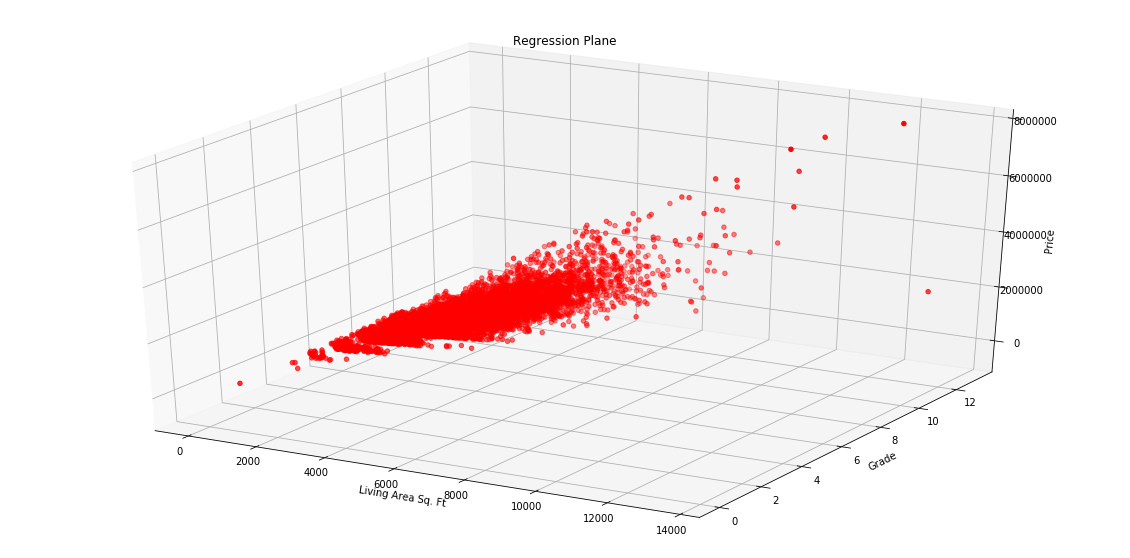

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')

x =two_df['sqft_living']
y =two_df['grade']
z =two_df['price']

modela = model.coef_[0]
modeli = model.coef_[1]
modelo = model.intercept_

x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = modela*xx + modeli*yy + modelo
plt3d = plt.gca(projection='3d')

plt3d.plot_surface(xx, yy, zz,alpha=0.1, color = 'r')
plt.title("Regression Plane")

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Living Area Sq. Ft')
ax.set_ylabel('Grade')
ax.set_zlabel('Price')

# Best-fit linear plane


plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [0]:
model.fit(X_train, y_train)
model.predict(X_test)

array([ 378448.21562225, 1539749.3694522 ,  544459.90274484, ...,
        359857.21092681,  207005.83340627,  433639.78567731])

In [0]:
model.coef_, model.intercept_

(array([-3.46742834e+04,  3.94309995e+04,  1.12610340e+02,  1.75888746e-01,
         7.42456797e+03,  6.05600540e+05,  5.27368869e+04,  2.61695179e+04,
         9.35901530e+04,  7.27875916e+01,  3.98227483e+01, -2.60713695e+03,
         2.01053037e+01, -5.67468820e+02,  6.04865960e+05, -2.22392027e+05,
         2.42333810e+01, -4.67450069e-01]), 4166134.7322877636)

In [0]:
multi_df = df.copy()

In [0]:
multi_df['Prediction'] = model.predict(X)
multi_df['Error'] = multi_df['Prediction'] - y
multi_df['Absolute Error'] = multi_df["Error"].abs()
multi_df['Square Error'] = multi_df['Error'] ** 2

In [0]:
# Mean Squared Error
mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

36280106778.8776

In [0]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

190473.37551184837

In [0]:
# R Squared Score
r2_score(y_test, model.predict(X_test))

0.694931009511782

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
